<a href="https://colab.research.google.com/github/Ad0ol/Computer-Vision-Techniques-for-Image-Segmentation/blob/master/7_Region_Adjacency_Graph_(RAG)_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from skimage.color import rgb2gray 
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage.metrics import (adapted_rand_error, variation_of_information)
from sklearn.cluster import KMeans
import time
from sklearn.cluster import Birch

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


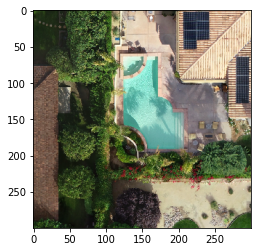

In [0]:
path0 = '/content/gdrive/My Drive/Adal&Norah-Project-CEN546/sample_images/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(image.shape)
plt.imshow(image)

(300, 300, 3)


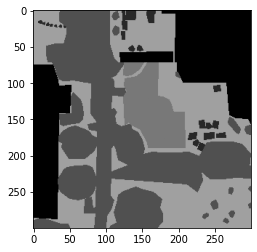

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
plt.imshow(GT*40)

# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

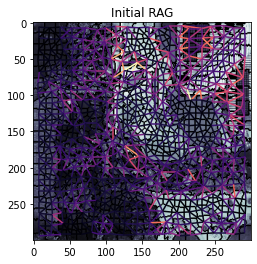

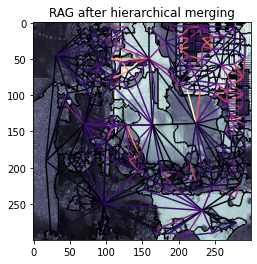

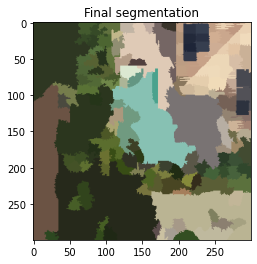

In [0]:

def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }
def merge_boundary(graph, src, dst):

    pass

edges = filters.sobel(rgb2gray(image))
labels = segmentation.slic(image, compactness=30, n_segments=400)
g = graph.rag_boundary(labels, edges)

graph.show_rag(labels, g, image)
plt.title('Initial RAG')

labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
in_place_merge=True, merge_func=merge_boundary, weight_func=weight_boundary)

graph.show_rag(labels, g, image)
plt.title('RAG after hierarchical merging')

plt.figure()
out = color.label2rgb(labels2, image, kind='avg')

plt.imshow(out, cmap='gray')
plt.title('Final segmentation')

plt.show()

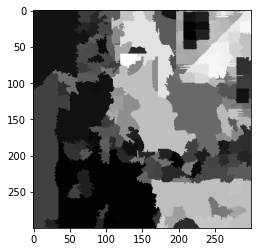

In [0]:
image_segmented = rgb2gray(out)
plt.imshow(image_segmented, cmap='gray')

image_reshaped shape:  (90000, 3)
[2 2 2 ... 4 4 4]


Text(0.5, 1.0, 'RAG result')

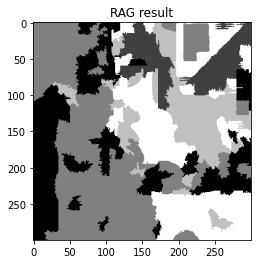

In [0]:
image_reshaped = np.reshape(out , ( out.shape[0]* out.shape[1] , out.shape[2]))
print('image_reshaped shape: ' , image_reshaped.shape)

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(image_reshaped)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict( image_reshaped  )
print(Z)

image_segmented = np.reshape(Z, (out.shape[0] , out.shape[1] )  )

plt.imshow(image_segmented*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4
plt.title("RAG result")

Text(0.5, 1.0, 'Grount Truth')

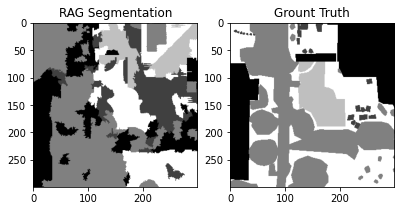

In [0]:
image_segmented_new = np.zeros(image_segmented.shape)
idx = image_segmented==0
image_segmented_new[idx] = 0
idx = image_segmented==1
image_segmented_new[idx] = 3
idx = image_segmented==2
image_segmented_new[idx] = 2
idx = image_segmented==3
image_segmented_new[idx] = 1
idx = image_segmented==4
image_segmented_new[idx] = 4

image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
plt.title("RAG Segmentation")

ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
plt.title("Grount Truth")

# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, 

In [0]:
Grount_truth_img = rgb2gray(GT)
print(np.unique(Grount_truth_img))

Grount_truth_pixcels=np.around(Grount_truth_img*1000,decimals=0)

Grount_truth_pixcelsInt=Grount_truth_pixcels.astype(int)
print(np.unique(Grount_truth_pixcelsInt))
print(Grount_truth_pixcelsInt.shape)

[0.         0.00392157 0.00784314 0.01176471 0.01568628]
[ 0  4  8 12 16]
(300, 300)


90000
300
[0 1 2 3 4]
[0 1 2 3 4]
(300, 300)


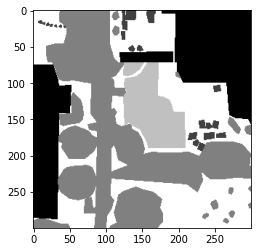

In [0]:
Grount_truth_img_Test = Grount_truth_pixcelsInt.copy()
Grount_truth_img_Test = Grount_truth_pixcelsInt.reshape(Grount_truth_pixcelsInt.shape[0]*Grount_truth_pixcelsInt.shape[1])
for i in range(Grount_truth_img_Test.shape[0]):
    if Grount_truth_img_Test[i] == 0:
        Grount_truth_img_Test[i] = 0  
    elif Grount_truth_img_Test[i] == 4:
        Grount_truth_img_Test[i] = 1 
    elif Grount_truth_img_Test[i] == 12:  
        Grount_truth_img_Test[i] = 3  
    elif Grount_truth_img_Test[i] == 8:  
        Grount_truth_img_Test[i] = 2  
    elif Grount_truth_img_Test[i] == 16:  
        Grount_truth_img_Test[i] = 4   

print (Grount_truth_img_Test.shape[0])    
Grount_truth_pixcelsInt = Grount_truth_img_Test.reshape(Grount_truth_pixcelsInt.shape[0],Grount_truth_pixcelsInt.shape[1])
print (Grount_truth_pixcelsInt.shape[0])    

print(np.unique(Grount_truth_pixcelsInt))
gray_rInt=image_segmented_new.astype(int)

print(np.unique(gray_rInt))
print(gray_rInt.shape)
plt.imshow(Grount_truth_pixcelsInt, cmap='gray')

In [0]:
error, precision, recall = adapted_rand_error(Grount_truth_pixcelsInt, gray_rInt)
print("Error: " , error*100)
print("Precision: " , precision*100)
print("Recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_pixcelsInt, gray_rInt)

def Cal_accuracy(classification_scores, true_labels):
    classification_scoresC = classification_scores.copy()
    classification_scoresC = classification_scores.reshape(classification_scores.shape[0]*classification_scores.shape[1])
    true_labelsC = true_labels.copy()
    true_labelsC = true_labels.reshape(true_labels.shape[0]*true_labels.shape[1])
        
    num_correct = 0
    for i in range(len(classification_scoresC)):
        if classification_scoresC[i] == true_labelsC[i]:
            num_correct += 1
    return num_correct / len(true_labelsC)

ACC=Cal_accuracy(Grount_truth_pixcelsInt, gray_rInt)
print("Pixel Accuracy: ", ACC*100)

Error:  55.328691601435466
Precision:  37.527036706712295
Recall:  55.17542031444099
Accuracy:  41.33777777777778
